In [1]:
import kagglehub

# Download the latest version of the LFW dataset
path = kagglehub.dataset_download("atulanandjha/lfwpeople")

print("Path to dataset files:", path)


100%|██████████| 232M/232M [00:02<00:00, 119MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3


In [2]:
import tarfile
import os

# Define paths
dataset_path = "/root/.cache/kagglehub/datasets/atulanandjha/lfwpeople/versions/3"
lfw_tgz_path = os.path.join(dataset_path, "lfw-funneled.tgz")
extract_path = "./lfw_data"

# Extract if it exists
if os.path.exists(lfw_tgz_path):
    with tarfile.open(lfw_tgz_path, "r:gz") as tar:
        tar.extractall(extract_path)
    print(f"Dataset extracted to: {extract_path}")
else:
    print("Error: lfw-funneled.tgz not found in the dataset directory!")


Dataset extracted to: ./lfw_data


In [3]:
print("Extracted files:", os.listdir("./lfw_data"))


Extracted files: ['lfw_funneled']


In [4]:
import cv2
import numpy as np

def load_lfw_images(directory, image_size=(160, 160)):
    images = []
    labels = []

    for person in os.listdir(directory):
        person_path = os.path.join(directory, person)
        if os.path.isdir(person_path):
            for img_name in os.listdir(person_path):
                img_path = os.path.join(person_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, image_size)
                    images.append(img)
                    labels.append(person)

    return np.array(images), labels

# Load dataset
lfw_directory = "./lfw_data/lfw_funneled"
images, labels = load_lfw_images(lfw_directory)

print(f"Loaded {len(images)} images from {len(set(labels))} individuals.")


Loaded 13233 images from 5749 individuals.


In [5]:
!pip install mtcnn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.5 MB/s eta 0:00:00


In [6]:
from mtcnn import MTCNN

# Initialize face detector
detector = MTCNN()

def detect_face(image):
    faces = detector.detect_faces(image)
    if len(faces) == 0:
        return None  # No face detected

    x, y, w, h = faces[0]['box']
    face = image[y:y + h, x:x + w]  # Crop the detected face
    face = cv2.resize(face, (160, 160))  # Resize for FaceNet
    return face

# Detect faces in the dataset
detected_faces = []
filtered_labels = []

for img, label in zip(images, labels):
    face = detect_face(img)
    if face is not None:
        detected_faces.append(face)
        filtered_labels.append(label)

print(f"Detected {len(detected_faces)} faces out of {len(images)} images.")


Detected 12876 faces out of 13233 images.


In [7]:
!pip install keras-facenet


  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=b93368692b0f358ac49c91c5d04918797ebc157273fe4760130a3d3e8fb1d656
  Stored in directory: /root/.cache/pip/wheels/99/94/dd/cb1a65a7440ba6d508bd24346c15af0b1d24ff8b1cdb1c9959
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet

# Initialize FaceNet model
embedder = FaceNet()

def get_face_embedding(face_image):
    face_image = np.expand_dims(face_image, axis=0)  # Add batch dimension
    embedding = embedder.embeddings(face_image)  # Get feature vector
    return embedding[0]  # Return the first (and only) face embedding

# Generate embeddings for all detected faces
face_embeddings = {}
for face, label in zip(detected_faces, filtered_labels):
    embedding = get_face_embedding(face)
    face_embeddings[label] = embedding

print(f"Extracted embeddings for {len(face_embeddings)} faces.")


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━

In [11]:
import pickle

with open("face_embeddings.pkl", "wb") as f:
    pickle.dump(face_embeddings, f)

print("Face embeddings saved successfully!")


Face embeddings saved successfully!


In [13]:
from numpy import dot
from numpy.linalg import norm

def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))

# Load stored embeddings
with open("face_embeddings.pkl", "rb") as f:
    known_faces = pickle.load(f)

# Recognize a new face
def recognize_face(image):
    face = detect_face(image)
    if face is None:
        return "No face detected"

    embedding = get_face_embedding(face)
    best_match = None
    best_score = 0

    for name, known_embedding in known_faces.items():
        similarity = cosine_similarity(embedding, known_embedding)
        if similarity > best_score:
            best_score = similarity
            best_match = name

    return best_match if best_score > 0.8 else "Unknown"

# Test with an uploaded image
test_image_path = "/content/photo.png"  # Use your uploaded image
test_image = cv2.imread(test_image_path)

result = recognize_face(test_image)
print("Recognized Person:", result)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Recognized Person: Unknown


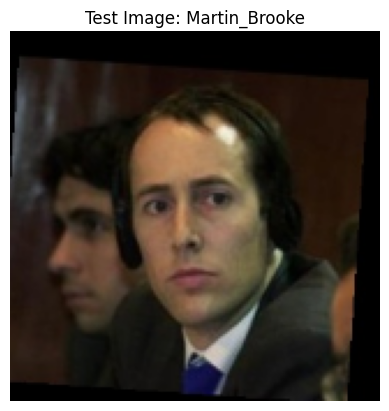

In [15]:
import random
import matplotlib.pyplot as plt

# Select a random image from the dataset
index = random.randint(0, len(images) - 1)
test_image = images[index]
test_label = labels[index]

# Display the selected image
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.title(f"Test Image: {test_label}")
plt.show()
